In [5]:
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

import opendatasets as od

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [6]:
dataset='https://www.kaggle.com/unsdsn/world-happiness?select=2017.csv'
od.download(dataset)

100%|██████████| 36.8k/36.8k [00:00<00:00, 330kB/s]

In [7]:
data_dir = '.\\world-happiness'
os.listdir(data_dir)

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']

In [11]:
wh = pd.read_csv("2017.csv") #Read the dataset
wh.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [12]:
wh.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

<AxesSubplot:>

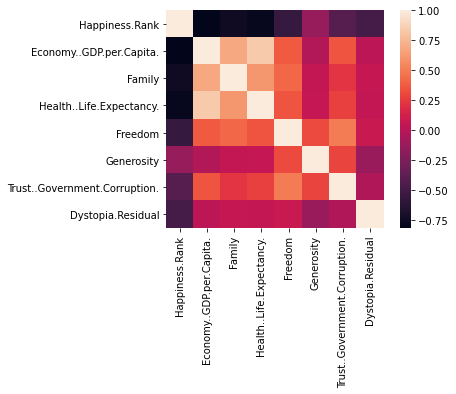

In [13]:
#subset the data
heat_map_var = wh[['Happiness.Rank','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.','Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']]

cor = heat_map_var.corr() # correlation between features
sns.heatmap(cor,square=True) #plot heat map

We can see correlation (shown in the lighter shades) among the variables.  We can see the happiness score is correlated 
with GDP, family, life-expectancy.

In [15]:
# next scale the data because of the number of variables

ss = StandardScaler()
ss.fit_transform(heat_map_var)

array([[-1.7209121 ,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [-1.69856259,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [-1.67621309,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [ 1.67621309, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [ 1.69856259, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [ 1.7209121 , -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

In [ ]:
# next use k-means to cluster the data.  clusters are formed based on the "closeness" to the center value.  
#the initial center value is chosen at random. I will pick the number of clusters

In [16]:
# k-means clustering

def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(heat_map_var, 2)
kmeans = pd.DataFrame(clust_labels)
heat_map_var.insert((heat_map_var.shape[1]),'kmeans',kmeans)

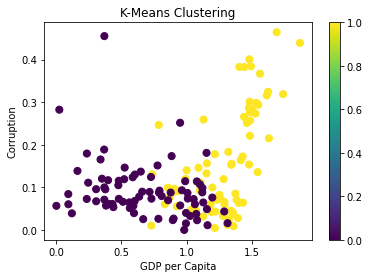

In [17]:
#Plot the clusters obtained using k means

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(heat_map_var['Economy..GDP.per.Capita.'],heat_map_var['Trust..Government.Corruption.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

In [ ]:
#Agglomerative Clustering - Hierarchical clustering

# does not require the user to specify the number of clusters. 
#Initially, each point is considered as a separate cluster, 
#then it recursively clusters the points together depending upon the distance between 

In [19]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(heat_map_var, 2)
agglomerative = pd.DataFrame(clust_labels1)
heat_map_var.insert((heat_map_var.shape[1]),'agglomerative',agglomerative)

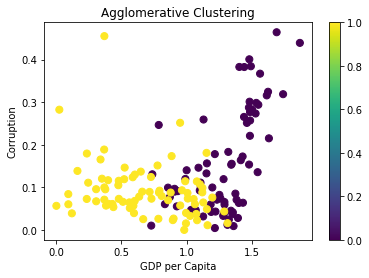

In [20]:
#Plot the clusters obtained using Hierarchical clustering

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(heat_map_var['Economy..GDP.per.Capita.'],heat_map_var['Trust..Government.Corruption.'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)